In [58]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.HeartDisease.unique()

array([0, 1], dtype=int64)

In [4]:
df.shape

(918, 12)

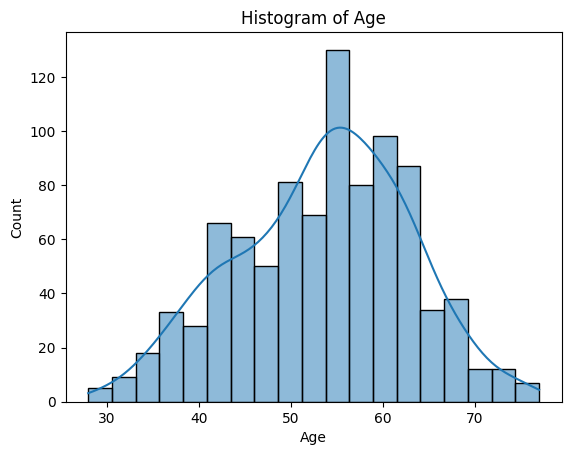

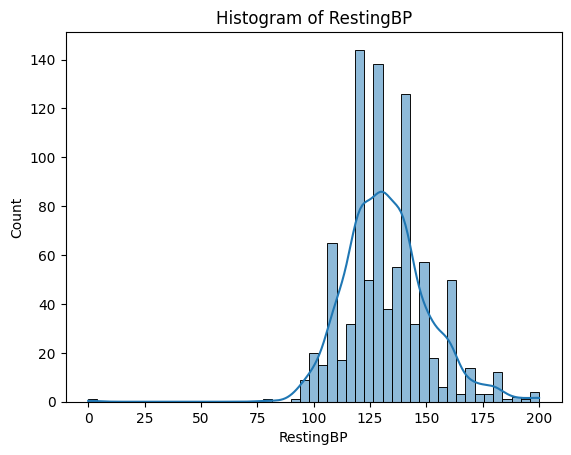

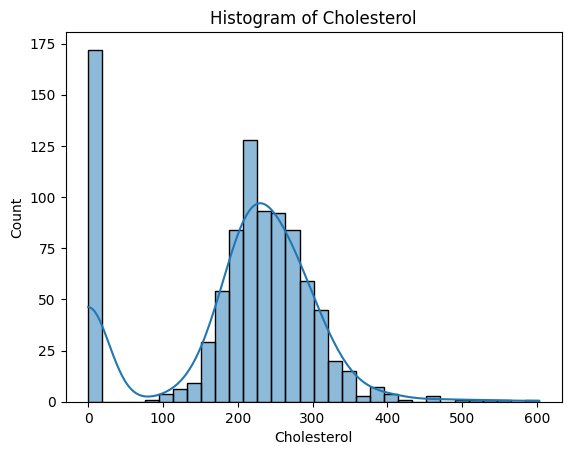

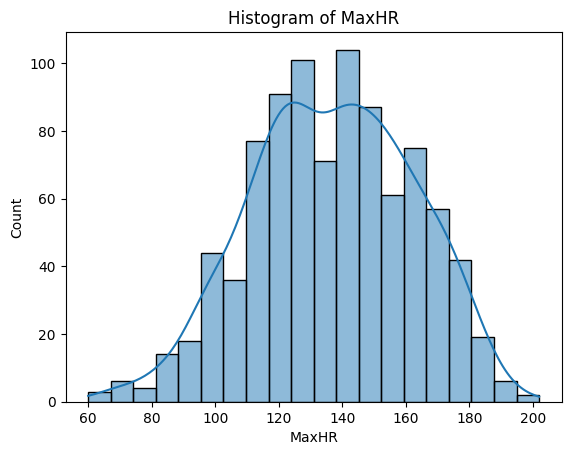

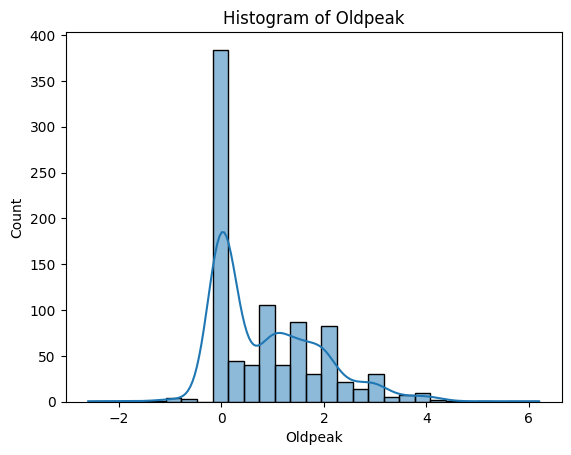

In [5]:
numerical_columns = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

# Plotting histograms
for column in numerical_columns:
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

### Any datapoint that is greater than +3 std (or) -3 std is consider as an outlier.
Screenshot of general guidelines of an outlier:
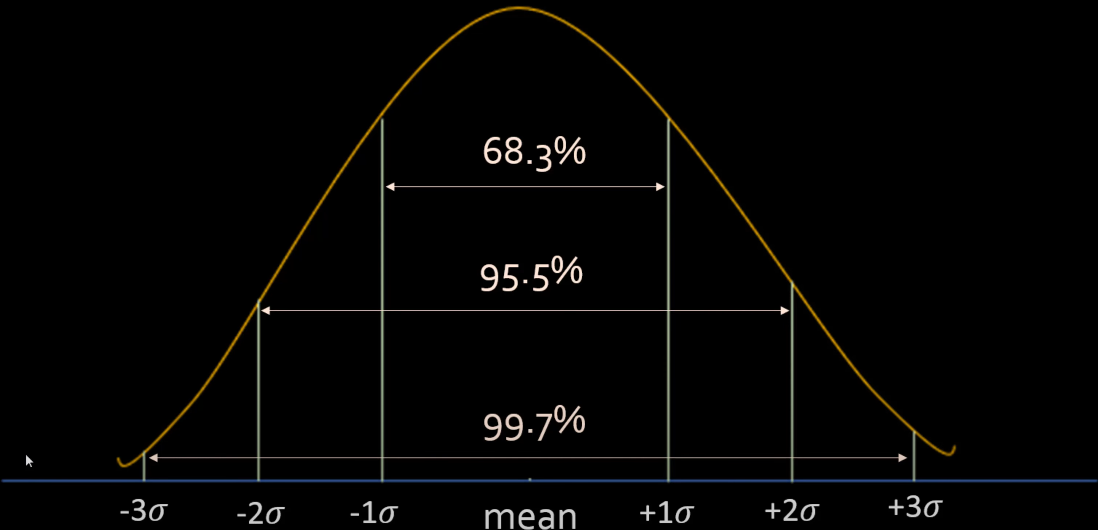

# Z Score
Z score indicates how many standard deviation (std) away a datapoint is from the mean,

for example, if mean is **df_mean** and std is **df_std** away:

**df_mean+3*df_std**

### Formula:
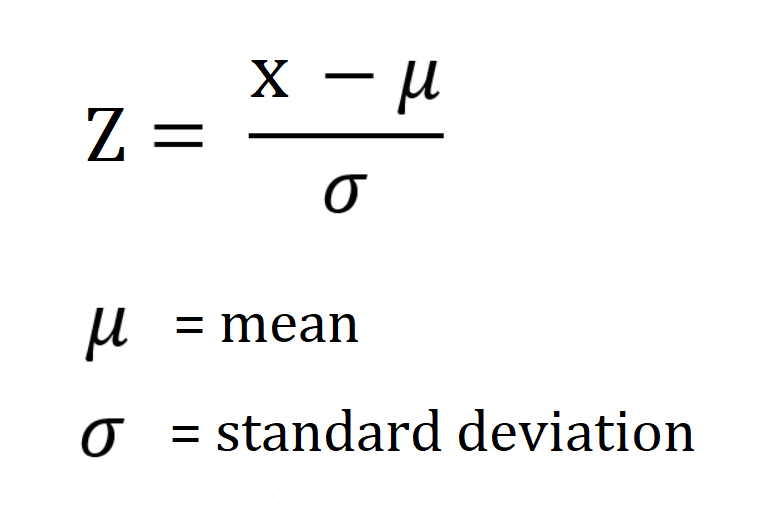

In [6]:
df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


### Removing Outliers

In [8]:
# function to get z_score
def get_zscore(column):
    return (column - column.mean()) / column.std()

# Now lets create z score for the following columns
df['Age_zscore'] = get_zscore(df.Age)
df['RestingBP_zscore'] = get_zscore(df.RestingBP)
df['Cholesterol_zscore'] = get_zscore(df.Cholesterol)
df['MaxHR_zscore'] = get_zscore(df.MaxHR)
df['Oldpeak_zscore'] = get_zscore(df.Oldpeak)

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_zscore,RestingBP_zscore,Cholesterol_zscore,MaxHR_zscore,Oldpeak_zscore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,-1.432359,0.410685,0.824621,1.382175,-0.831979
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,-0.478223,1.490940,-0.171867,0.753746,0.105606
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-1.750404,-0.129442,0.769768,-1.524307,-0.831979
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,-0.584238,0.302660,0.138964,-1.131539,0.574398
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.051853,0.950812,-0.034736,-0.581664,-0.831979


Now, lets remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 or Z score < -3

In [11]:
def filter_zscores(df, columns):
    outlier_removal = (df[columns] > -3) & (df[columns] < 3)
    return df[outlier_removal.all(axis=1)]

columns_to_filter = ['Age_zscore', 'RestingBP_zscore', 'Cholesterol_zscore', 'MaxHR_zscore', 'Oldpeak_zscore']
df_filtered = filter_zscores(df, columns_to_filter)

df_filtered.shape

(899, 17)

We removed the outliers and let's drop the z score columns cuz we have no use for that.

In [12]:
df_filtered = df_filtered.drop(columns=['Age_zscore', 'RestingBP_zscore', 'Cholesterol_zscore', 'MaxHR_zscore', 'Oldpeak_zscore'])

df_filtered.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [13]:
df_filtered.shape

(899, 12)

In our original dataset,
- df.shape -> (918, 12)

In our filtered dataset,
- df_filtered.shape -> (899, 12)

Hence, we removed the outliers

### Label Encoder for converting text columns

In [28]:
from sklearn.preprocessing import LabelEncoder

# function to transform text columns using Label encoder
def get_le(column):
    le = LabelEncoder()
    return le.fit_transform(column)

# function to apply text columns
def apply_col(df, columns):
    for column in columns:
        df[column] = get_le(df[column])
    return df

In [30]:
text_col = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope',]

df_filtered = apply_col(df_filtered, text_col)

df_filtered.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


Let's look at how we encoded our text columns

In [40]:
for col in text_col:
    print(f"{df[col].unique()} -> {(df_filtered[col].unique())}")

['M' 'F'] -> [1 0]
['ATA' 'NAP' 'ASY' 'TA'] -> [1 2 0 3]
['Normal' 'ST' 'LVH'] -> [1 2 0]
['N' 'Y'] -> [0 1]
['Up' 'Flat' 'Down'] -> [2 1 0]


### Standard Scaling
let's scale our values for consistency. I'm using **StandardScaler** you can also use **MinMaxScaler**

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

### Training

In [49]:
X = df_filtered.drop(df_filtered[['HeartDisease']], axis='columns')
y = df_filtered.HeartDisease

# y.head()
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [54]:
X_scale = scaler.fit_transform(X)

X_scale[0]

array([-1.42815446,  0.515943  ,  0.2245723 ,  0.46590022,  0.84963584,
       -0.5503622 ,  0.01414258,  1.38431998, -0.8229452 , -0.85546862,
        1.04249607])

we can convert it back to a DataFrame but we can also feed it directly for training our model

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2)

In [57]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [56]:
# get score funciton for different models
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [59]:
get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test)

0.8333333333333334

In [74]:
get_score(SVC(C=6, kernel='rbf', gamma='scale'), X_train, X_test, y_train, y_test)

0.8888888888888888

In [88]:
get_score(RandomForestClassifier(n_estimators=200, criterion='gini'), X_train, X_test, y_train, y_test)

0.8888888888888888

### PCA (Principal Component Analysis)
Let's use PCA **"95%"** for our dimensionality reduction meaning 95% of columns will be retained

In [89]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

In [91]:
X.head() # our original train columns

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [92]:
X_pca = pca.fit_transform(X)

X_pca

array([[ 93.12926348, -29.67413245],
       [-16.33750689, -14.81536427],
       [ 82.66842478,  38.91589868],
       ...,
       [-68.22644416,  17.7012641 ],
       [ 40.02690223, -33.47134474],
       [-20.61151816, -37.62451392]])

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

In [157]:
get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test)

0.7388888888888889

In [158]:
get_score(SVC(C=6, kernel='rbf', gamma='scale'), X_train, X_test, y_train, y_test)

0.7388888888888889

In [191]:
get_score(RandomForestClassifier(n_estimators=100, criterion='gini'), X_train, X_test, y_train, y_test)

0.7055555555555556